# Project: Investigate a Dataset (TMDB Movies Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The TMDB movies dataset contains information about 10,000+ movies collected from The Movie Database (TMDb), including budget, revenue, user ratings, popularity and more.

Research questions:
- How budget affects revenue ?
- What are the features that are associated with high revenue ?
- What is the optimal range of movies runtime to maximize revenue and popularity ?
- How movies ratings are changing over the years ?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
TMDB = pd.read_csv('tmdb-movies.csv')
TMDB.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Check columns data types
TMDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
# Get the number of null values in each column
TMDB.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

No null values in the columns that we are concerned about

In [5]:
# Get the number of duplicated rows
TMDB.duplicated().sum()

1

## Data Cleaning

Dropping duplicated rows

In [6]:
TMDB.drop_duplicates(inplace=True)

Drop unnecessary columns that are not related to our questions

In [7]:
TMDB.drop(['id','imdb_id','cast','director','homepage','genres','tagline','keywords','overview','production_companies'], axis=1, inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

General stats about the dataset

In [8]:
# General stats
TMDB.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### How budget affects revenue ?

Plotting a regression plot to see if budget and revenue are correlated

<AxesSubplot:xlabel='budget', ylabel='revenue'>

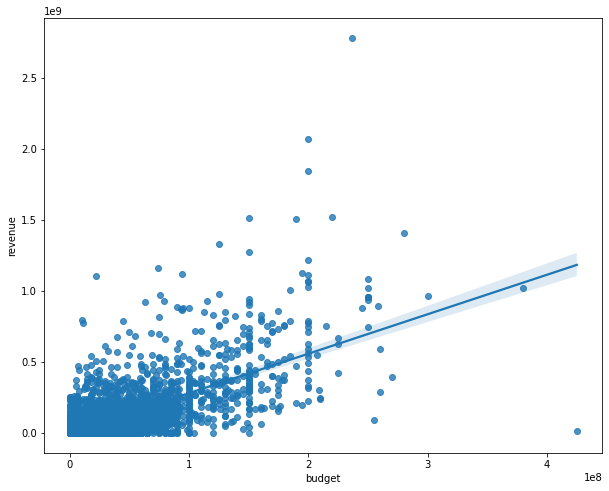

In [9]:
plt.figure(figsize=(10,8))
sns.regplot(x=TMDB['budget'], y=TMDB['revenue'])

Get the correlation coefficient of budget and revenue

In [10]:
TMDB['budget'].corr(TMDB['revenue'])

0.7349279812889289

There is a moderate correlation between budget and revenue with a correlation coefficient of 0.73

### What are the features that are associated with high revenue ?

Plotting a pair plot to observe how other features are related to revenue

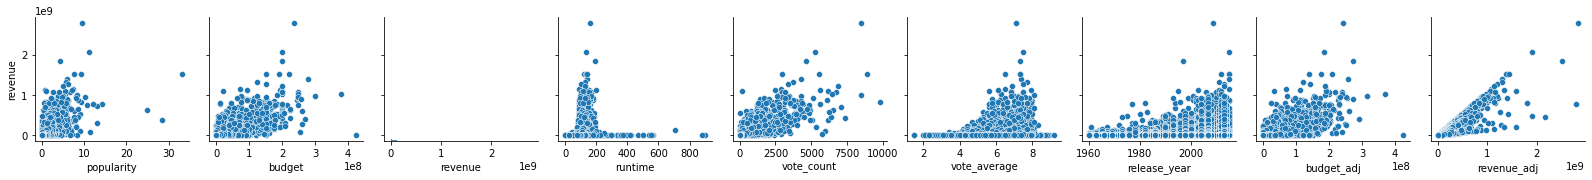

In [11]:
sns.pairplot(data=TMDB, y_vars=['revenue'])

The above pair plot shows that popularity, budget and vote count might have some correlation with revenue

Creating correlation heatmap to see which features have the highest correlation with revenue and sort them based on correlation coefficient in descending order

In [12]:
# Create correlation matrix for all feature in the dataset
corr = TMDB.corr()
# Take only correlations with 'revenue' and sort them based on correlation coefficient in descending order
corr = corr[['revenue']].sort_values(by='revenue', ascending=False)

<AxesSubplot:>

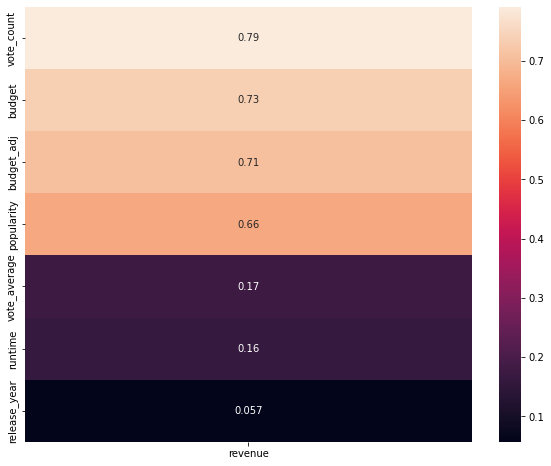

In [13]:
# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data=corr[2:], annot=True)

We can see the features that have the highest impact on revenue are vote count, budget and popularity.

### What is the the optimal range of movies runtime to maximize revenue and popularity ?

<AxesSubplot:xlabel='runtime', ylabel='revenue'>

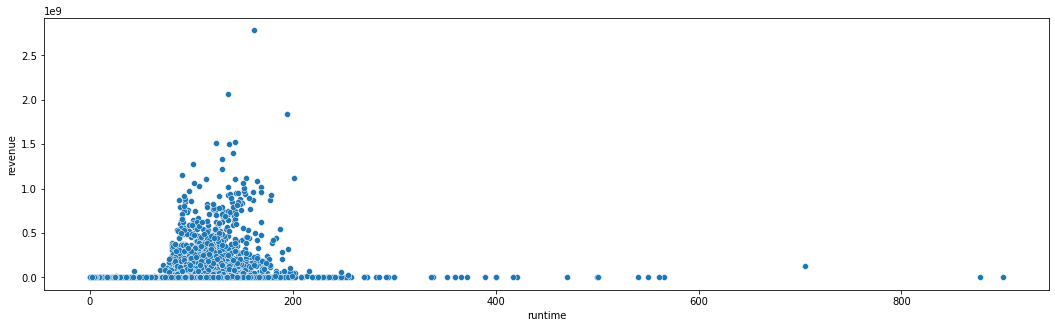

In [14]:
plt.figure(figsize=(18,5))
sns.scatterplot(x=TMDB['runtime'], y=TMDB['revenue'])

<AxesSubplot:xlabel='runtime', ylabel='popularity'>

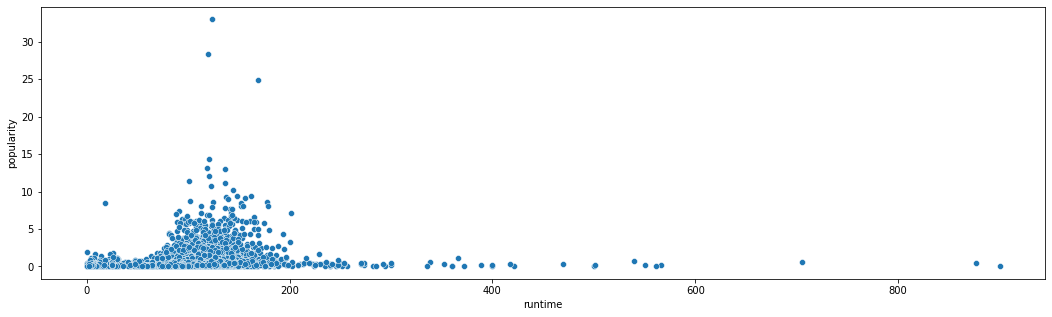

In [15]:
plt.figure(figsize=(18,5))
sns.scatterplot(x=TMDB['runtime'], y=TMDB['popularity'])

Movies that are 50 to 200 minutes long had the highest revenue and popularity compared to movies that are longer or shorter than this range

### How movies ratings are changing over the years ?

In [16]:
# Take the average vote for eaach year
avg_rating = TMDB.groupby(['release_year'])['vote_average'].mean()

Plot a line chart to visualize average ratings over the years

<AxesSubplot:xlabel='release_year', ylabel='vote_average'>

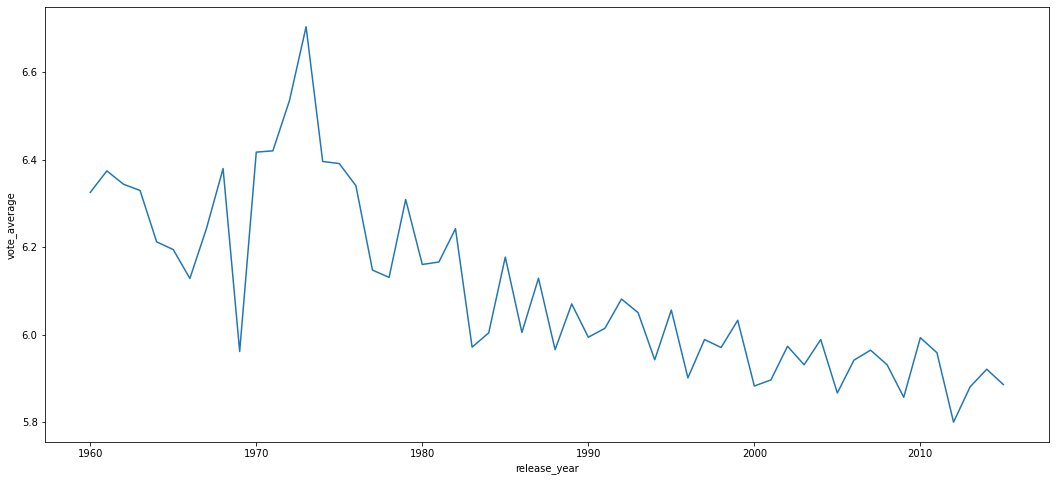

In [17]:
plt.figure(figsize=(18,8))
sns.lineplot(data=avg_rating)

On average, movies ratings are going down over the years

<a id='conclusions'></a>
## Conclusions

- Movies with higher budget tend to have higher revenue, however, having high budget doesn't necessarily mean the movie will have high revenue, some movies have very high budget, yet they have very low revenue and vice versa.
- The features that are the most associated with revenue are budget, popularity and vote count.
- Movies that are 50 to 200 minutes long had higher revenue and popularity compared to movies that are longer or shorter than this range
- Movies ratings are slowly decreasing over the years